# Comparison Plots

Code for generating difference plots between realtime renders and path traced renders.

In [2]:
import numpy as np
import plotly as plt
import matplotlib.pyplot as pyplot
from matplotlib.image import imread
import openexr_numpy


(1024, 1024, 3)
[0.41796875 0.41796875 0.4140625 ] [0.41960004 0.41960004 0.41960004] 0.0029333532


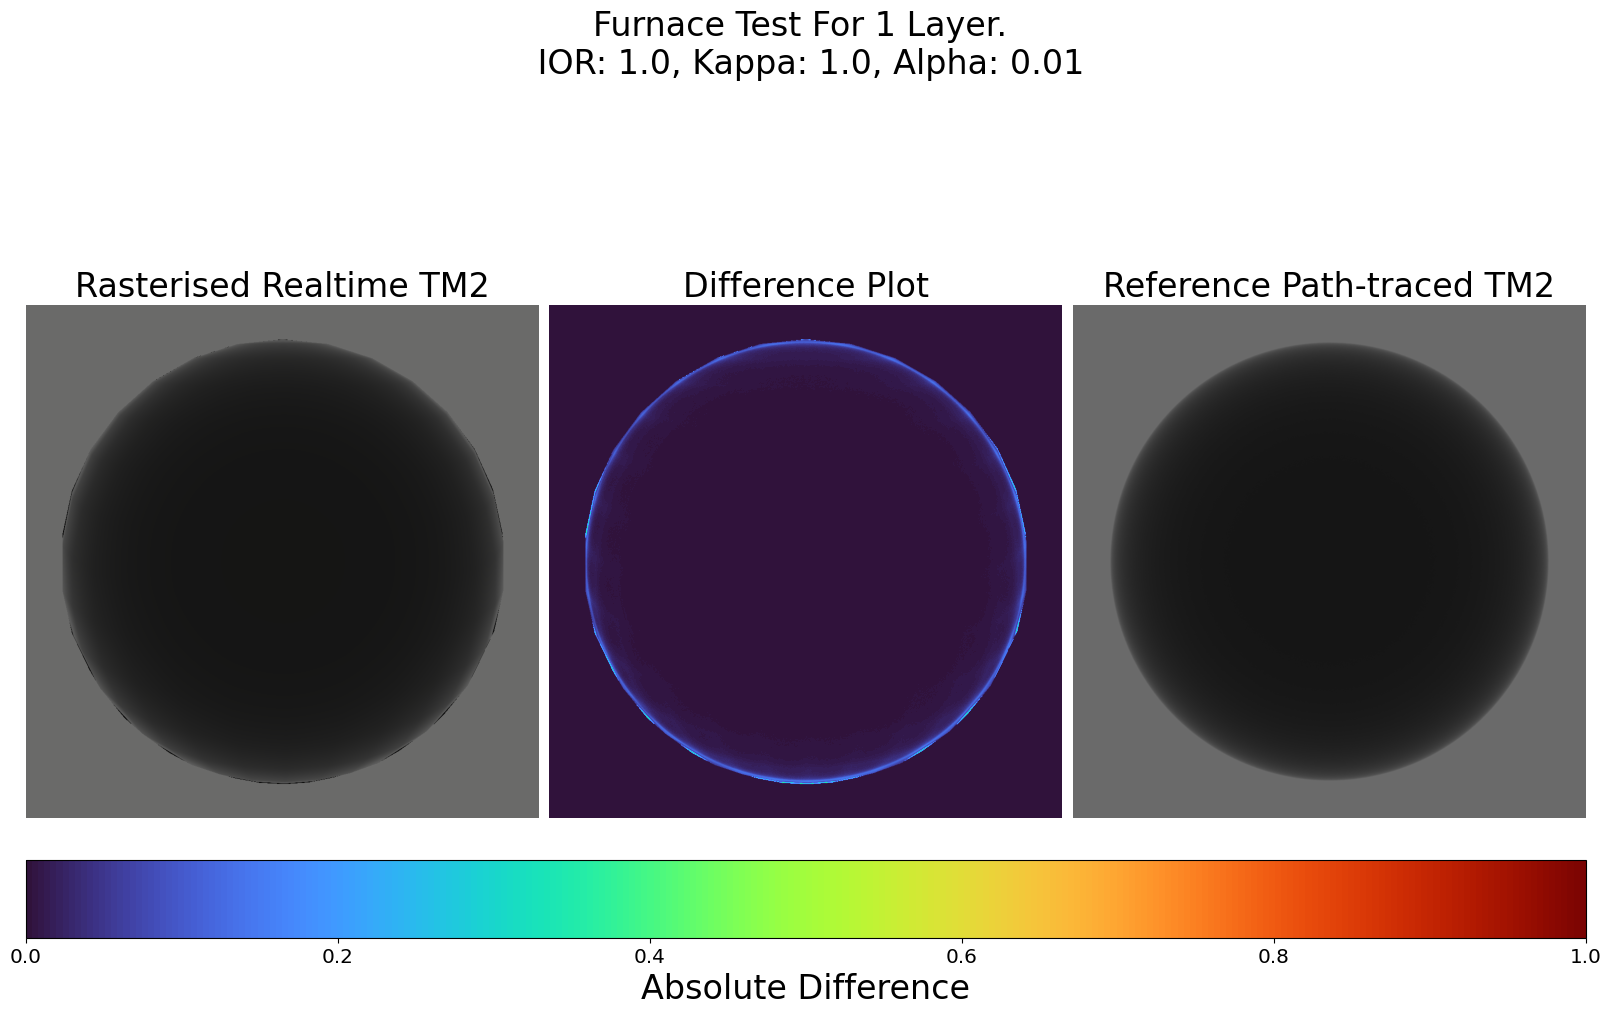

In [3]:
def crop_center(img, cropx, cropy):
    y,x,c = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2
    return img[starty:starty+cropy, startx:startx+cropx, :]

def adjust_gamma(image: np.ndarray, gamma=1.0):
    igamma = 1.0/gamma
    imin, imax = image.min(), image.max()

    img_c = image.copy()
    img_c = ((img_c - imin) / (imax - imin)) ** igamma
    img_c = img_c * (imax - imin) + imin

    return img_c

twolayers = openexr_numpy.imread('energyleakage/onelayerraster.exr')
reference = openexr_numpy.imread('energyleakage/onelayerfurnace.exr')

twolayers = twolayers.astype(np.float32)

#reference = adjust_gamma(reference, 2)

twolayers = crop_center(twolayers, 1024, 1024)


twolayers = twolayers[:,:,:3] #drop the alpha channel
print(twolayers.shape)
#realtime = adjust_gamma(realtime, 0.13)

diff = np.abs(np.average(twolayers, axis=2) - np.average(reference, axis=2))

print(twolayers[5][0], reference[5][0], diff[1][0])

FONTSIZE = 24

fig = pyplot.figure(layout='constrained', figsize=(16,10))
fig.suptitle("Furnace Test For 1 Layer. \n IOR: 1.0, Kappa: 1.0, Alpha: 0.01", fontsize=FONTSIZE)

axtop = fig.subplots(nrows=1, ncols=3)
axtop[0].imshow(twolayers)
axtop[0].set_title("Rasterised Realtime TM2", fontsize=FONTSIZE)
axtop[2].imshow(reference,)
axtop[2].set_title("Reference Path-traced TM2", fontsize=FONTSIZE)

axtop[0].set_axis_off()
axtop[2].set_axis_off()

deltaplot = axtop[1]
deltaplot.set_title("Difference Plot", fontsize=FONTSIZE)


deltaplot.set_axis_off()
diffplot = deltaplot.imshow(diff, cmap='turbo', vmin=0, vmax=1)


col = fig.colorbar(diffplot, ax=axtop, orientation='horizontal', )
col.set_label(label="Absolute Difference", fontsize=FONTSIZE)
col.ax.tick_params(labelsize='x-large')





(1024, 1024, 3)
Average Difference 0.00836897
[0.41796875 0.41796875 0.4140625 ] [0.41959992 0.41959992 0.41959992] 0.0029337406


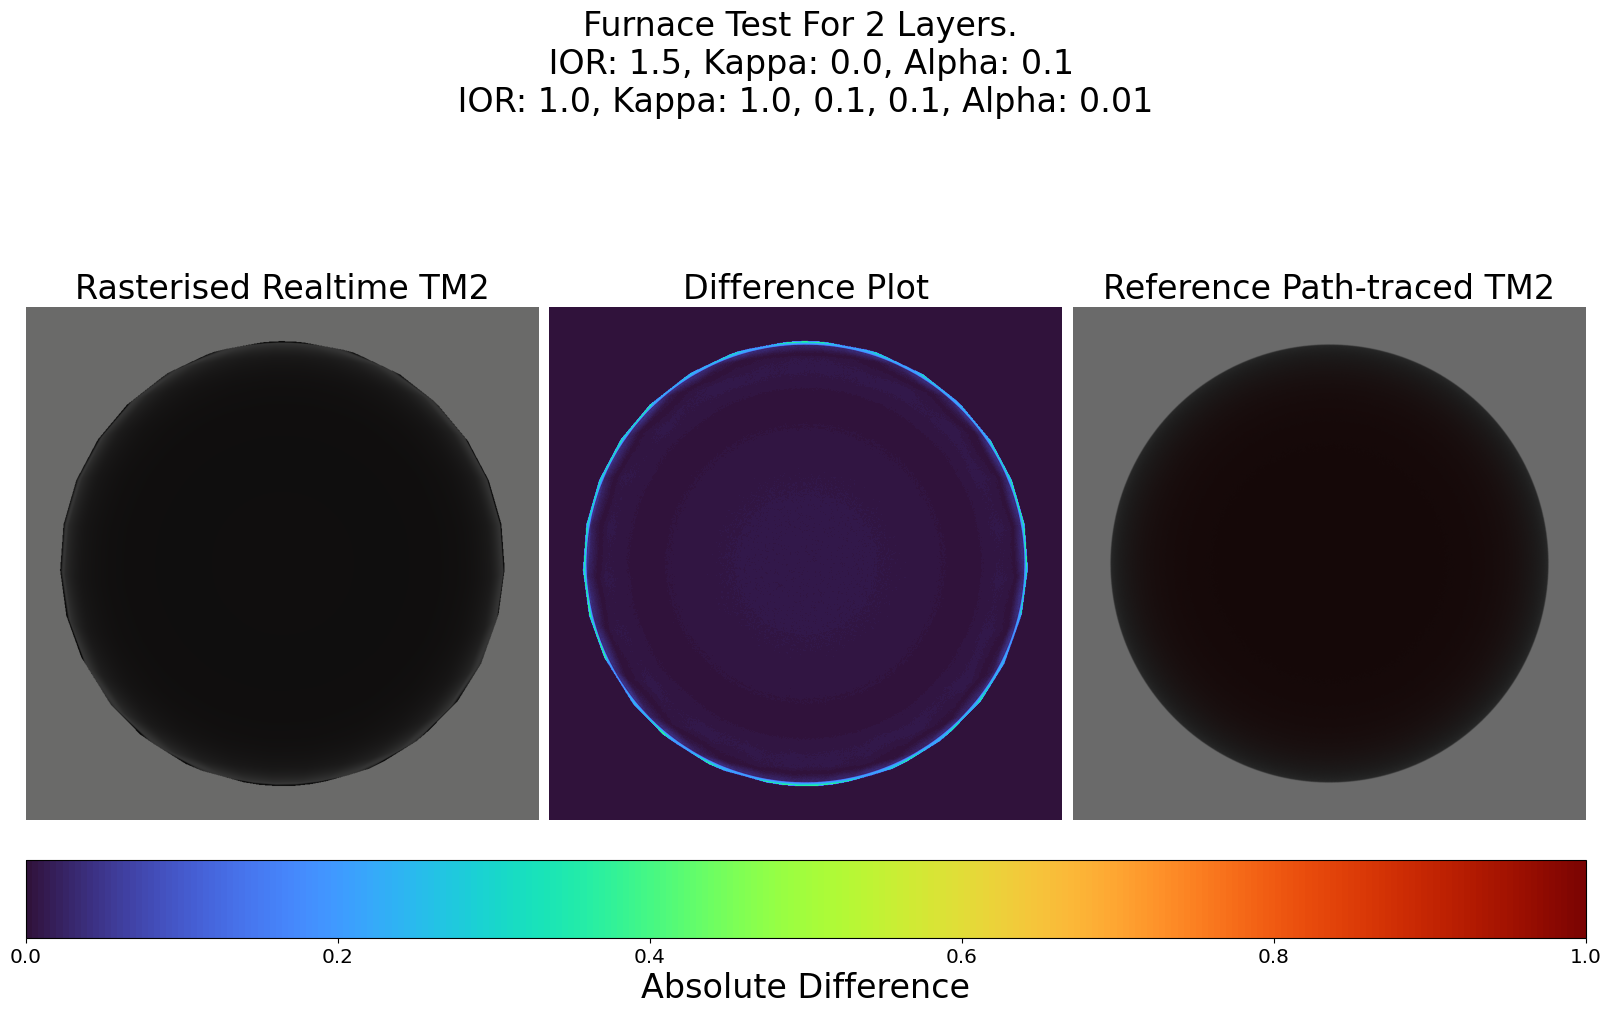

In [4]:
def crop_center(img, cropx, cropy):
    y,x,c = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2
    return img[starty:starty+cropy, startx:startx+cropx, :]

def adjust_gamma(image: np.ndarray, gamma=1.0):
    igamma = 1.0/gamma
    imin, imax = image.min(), image.max()

    img_c = image.copy()
    img_c = ((img_c - imin) / (imax - imin)) ** igamma
    img_c = img_c * (imax - imin) + imin

    return img_c

realtime = openexr_numpy.imread('energyleakage/2layerfurnacenewFGDIBLweight.exr')
reference = openexr_numpy.imread('energyleakage/twolayerfurnaceref.exr')

realtime = realtime.astype(np.float32)

#reference = adjust_gamma(reference, 2)

realtime = crop_center(realtime, 1024, 1024)


realtime = realtime[:,:,:3] #drop the alpha channel
print(realtime.shape)
#realtime = adjust_gamma(realtime, 0.13)

diff = np.abs(np.average(realtime, axis=2) - np.average(reference, axis=2))


print("Average Difference", np.average(diff))
print(realtime[5][0], reference[5][0], diff[1][0])

FONTSIZE = 24

fig = pyplot.figure(layout='constrained', figsize=(16,10))
fig.suptitle("Furnace Test For 2 Layers. \n \
IOR: 1.5, Kappa: 0.0, Alpha: 0.1\n IOR: 1.0, Kappa: 1.0, 0.1, 0.1, Alpha: 0.01 ", fontsize=FONTSIZE)

axtop = fig.subplots(nrows=1, ncols=3)
axtop[0].imshow(realtime)
axtop[0].set_title("Rasterised Realtime TM2", fontsize=FONTSIZE)
axtop[2].imshow(reference,)
axtop[2].set_title("Reference Path-traced TM2", fontsize=FONTSIZE)

axtop[0].set_axis_off()
axtop[2].set_axis_off()

deltaplot = axtop[1]
deltaplot.set_title("Difference Plot", fontsize=FONTSIZE)


deltaplot.set_axis_off()
diffplot = deltaplot.imshow(diff, cmap='turbo', vmin=0, vmax=1)


col = fig.colorbar(diffplot, ax=axtop, orientation='horizontal', )
col.set_label(label="Absolute Difference", fontsize=FONTSIZE)
col.ax.tick_params(labelsize='x-large')





Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..97.0].


(1024, 1024, 3)
Average Difference 0.011228026
[0.41796875 0.41796875 0.4140625 ] [0.41959992 0.41959992 0.41959992] 0.0029337406


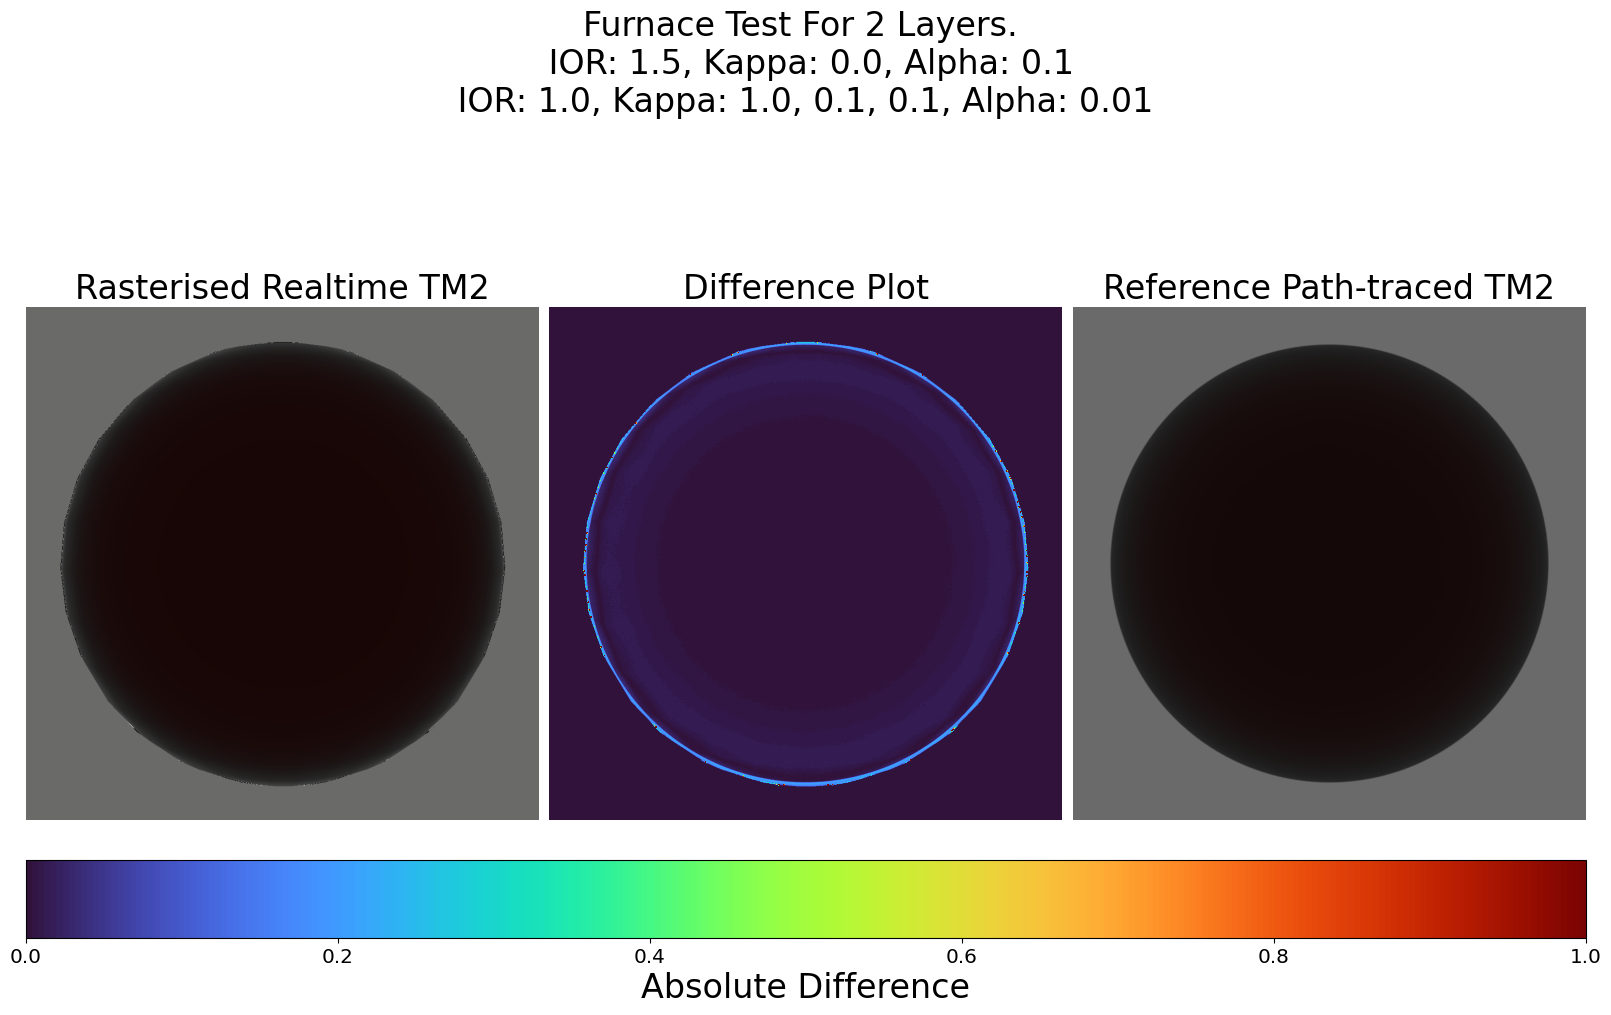

In [5]:
def crop_center(img, cropx, cropy):
    y,x,c = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2
    return img[starty:starty+cropy, startx:startx+cropx, :]

def adjust_gamma(image: np.ndarray, gamma=1.0):
    igamma = 1.0/gamma
    imin, imax = image.min(), image.max()

    img_c = image.copy()
    img_c = ((img_c - imin) / (imax - imin)) ** igamma
    img_c = img_c * (imax - imin) + imin

    return img_c

realtime = openexr_numpy.imread('energyleakage/2layerfurnaceheightcorrelatedG.exr')
reference = openexr_numpy.imread('energyleakage/twolayerfurnaceref.exr')

realtime = realtime.astype(np.float32)

#reference = adjust_gamma(reference, 2)

realtime = crop_center(realtime, 1024, 1024)


realtime = realtime[:,:,:3] #drop the alpha channel
print(realtime.shape)
#realtime = adjust_gamma(realtime, 0.13)

diff = np.abs(np.average(realtime, axis=2) - np.average(reference, axis=2))


print("Average Difference", np.average(diff))
print(realtime[5][0], reference[5][0], diff[1][0])

FONTSIZE = 24

fig = pyplot.figure(layout='constrained', figsize=(16,10))
fig.suptitle("Furnace Test For 2 Layers. \n \
IOR: 1.5, Kappa: 0.0, Alpha: 0.1\n IOR: 1.0, Kappa: 1.0, 0.1, 0.1, Alpha: 0.01 ", fontsize=FONTSIZE)

axtop = fig.subplots(nrows=1, ncols=3)
axtop[0].imshow(realtime)
axtop[0].set_title("Rasterised Realtime TM2", fontsize=FONTSIZE)
axtop[2].imshow(reference,)
axtop[2].set_title("Reference Path-traced TM2", fontsize=FONTSIZE)

axtop[0].set_axis_off()
axtop[2].set_axis_off()

deltaplot = axtop[1]
deltaplot.set_title("Difference Plot", fontsize=FONTSIZE)


deltaplot.set_axis_off()
diffplot = deltaplot.imshow(diff, cmap='turbo', vmin=0, vmax=1)


col = fig.colorbar(diffplot, ax=axtop, orientation='horizontal', )
col.set_label(label="Absolute Difference", fontsize=FONTSIZE)
col.ax.tick_params(labelsize='x-large')



(1024, 1024, 3)
Two Layer Average Energy: 0.07328759
Three Layer Average Energy: 0.102216445
This is 0.7169843316078186x greater than the two layer average.
Four layer average energy: 0.0576088
This is 1.7743200063705444x greater than the 3 layer average.


Text(0.4, 0.2, 'Incident energy: 0.42')

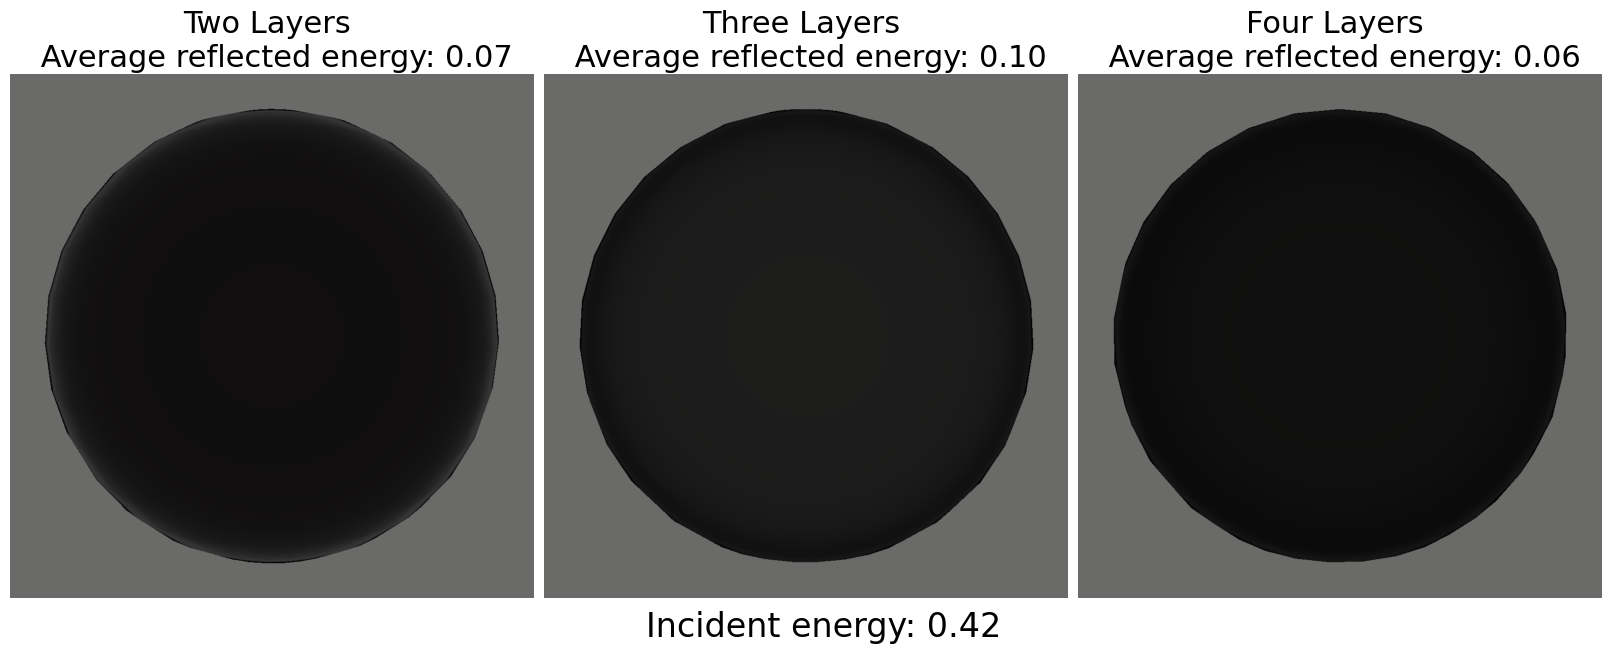

In [6]:
twolayers = openexr_numpy.imread('energyleakage/2layerfurnacenewFGDIBLweight.exr')
threelayers = openexr_numpy.imread('energyleakage/3layerfurnacenewFGDIBLweight.exr')
fourlayers = openexr_numpy.imread('energyleakage/4layerfurnacenewFGDIBLweight.exr')
reference = openexr_numpy.imread('energyleakage/twolayerfurnaceref.exr')

twolayers = twolayers.astype(np.float32)

#reference = adjust_gamma(reference, 2)
DIM = (1024, 1024)

twolayers = crop_center(twolayers, *DIM)
threelayers =crop_center(threelayers, *DIM)
fourlayers = crop_center(fourlayers, *DIM)

#mask out just the sphere for calculating average energy.
mask = reference < 0.4
backdrop = reference[0,0]


twolayers = twolayers.astype(np.float32)
twolayers = twolayers[:,:,:3] #drop the alpha channel

threelayers = threelayers.astype(np.float32)
threelayers = threelayers[:,:,:3]

fourlayers = fourlayers.astype(np.float32)
fourlayers = fourlayers[:,:,:3]

print(twolayers.shape)

# maskplot = pyplot.figure(1)
# ax = maskplot.subplots(1,1)

# mask = np.where(mask, 255, 0)
# ax.imshow(mask)

twolayeravg = np.average(twolayers[mask])
threelayeravg = np.average(threelayers[mask])
fourlayeravg = np.average(fourlayers[mask])

print("Two Layer Average Energy:",twolayeravg)
print("Three Layer Average Energy:", threelayeravg)
print(f"This is {twolayeravg / threelayeravg}x greater than the two layer average.")

print("Four layer average energy:", fourlayeravg)
print(f"This is {threelayeravg / fourlayeravg}x greater than the 3 layer average.")

overemission = pyplot.figure(1, layout='constrained', figsize=(16,10))
axes = overemission.subplots(1,3)

axes[0].imshow(twolayers)
axes[0].set_title(f"Two Layers \n Average reflected energy: {twolayeravg:.2f}", fontsize=FONTSIZE-2)
axes[0].set_axis_off()
axes[1].imshow(threelayers)
axes[1].set_title(f"Three Layers \n Average reflected energy: {threelayeravg:.2f}", fontsize=FONTSIZE-2)
axes[1].set_axis_off()
axes[2].imshow(fourlayers)
axes[2].set_title(f"Four Layers \n Average reflected energy: {fourlayeravg:.2f}", fontsize=FONTSIZE-2)
axes[2].set_axis_off()

pyplot.figtext(0.4, 0.2, f"Incident energy: {np.average(backdrop):.2f}", fontsize=FONTSIZE)

# Split-Sum Validation

(1024, 1024, 3)
Average Difference 0.008269732577287425
[0.41796875 0.41796875 0.4140625 ] [0.41959992 0.41959992 0.41959992] 0.0029337306817372455


(<Figure size 1600x1000 with 4 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Difference Plot'}>,
        <Axes: title={'center': 'Reference Path-traced TM2'}>],
       dtype=object))

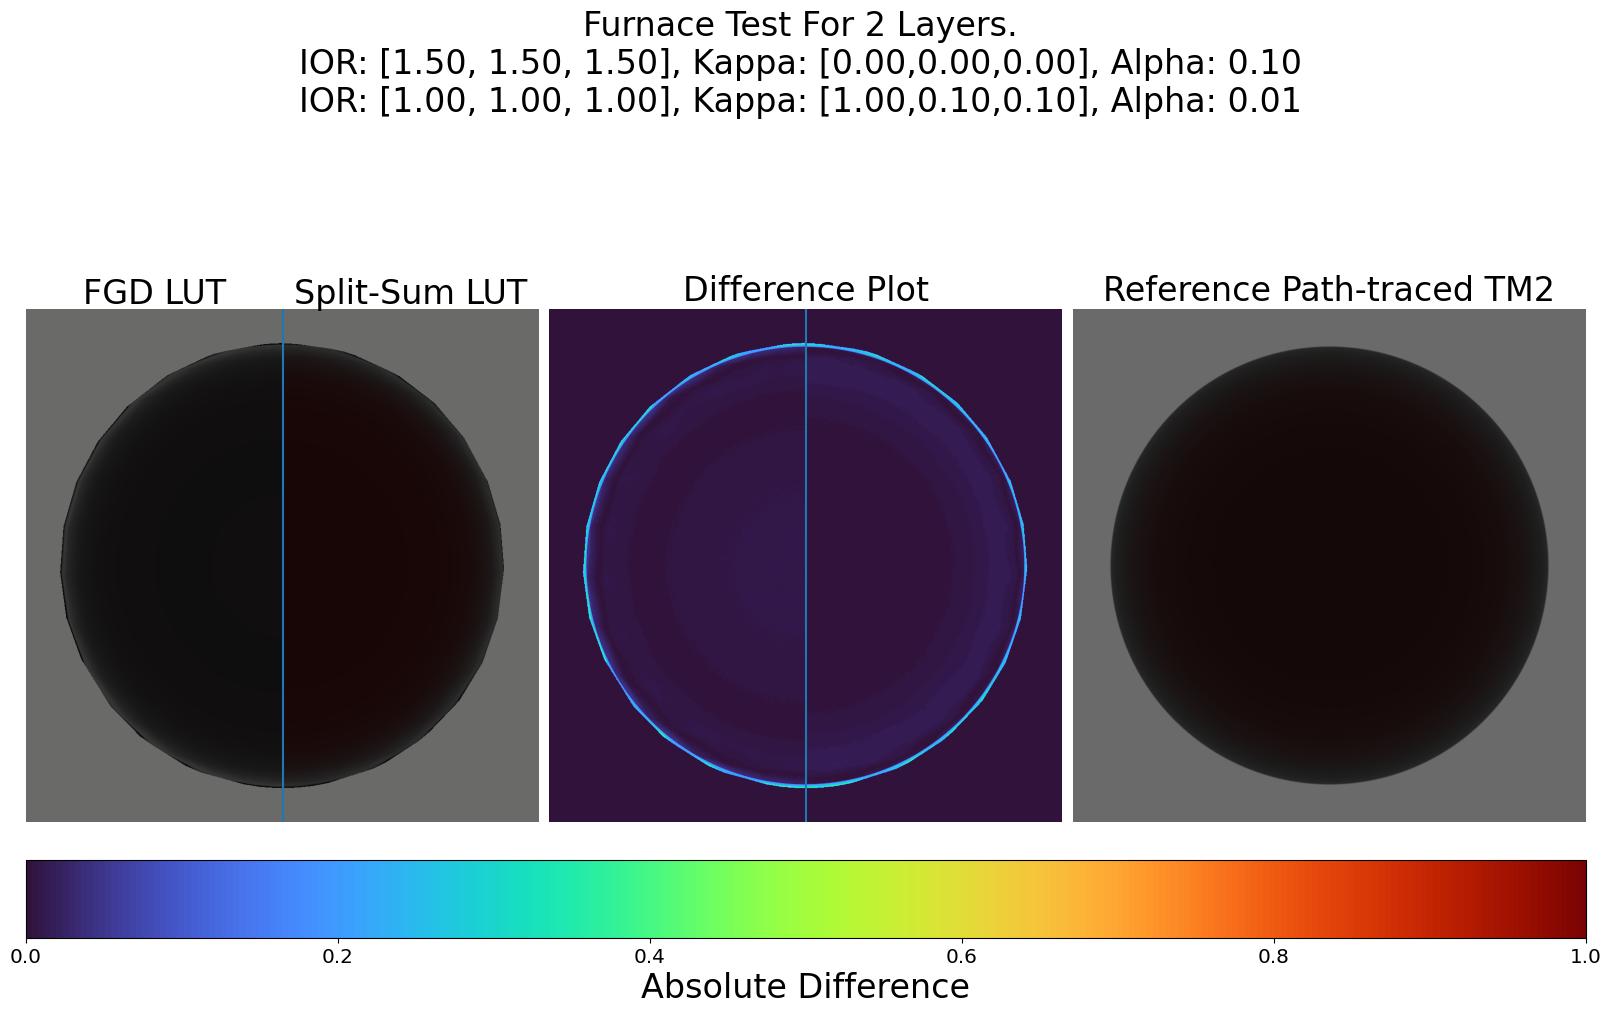

In [7]:
def crop_center(img, cropx, cropy):
    y,x,c = img.shape
    startx = x//2 - cropx//2
    starty = y//2 - cropy//2
    return img[starty:starty+cropy, startx:startx+cropx, :]

def adjust_gamma(image: np.ndarray, gamma=1.0):
    igamma = 1.0/gamma
    imin, imax = image.min(), image.max()

    img_c = image.copy()
    img_c = ((img_c - imin) / (imax - imin)) ** igamma
    img_c = img_c * (imax - imin) + imin

    return img_c



def compare_plot(splitsum_path, realtime_path, reference_path, LayerParams, tm6=False, leftLabel="FGD LUT", rightLabel="Split-Sum LUT"):
    realtimesplitsum = openexr_numpy.imread(splitsum_path)
    realtime = openexr_numpy.imread(realtime_path)
    reference = openexr_numpy.imread(reference_path)

    realtimesplitsum =realtimesplitsum.astype(np.float32)
    realtime = realtime.astype(np.float32)

    realtimesplitsum = crop_center(realtimesplitsum, 1024, 1024)
    realtime = crop_center(realtime, 1024, 1024)


    realtimesplitsum = realtimesplitsum[:,:,:3]
    realtime = realtime[:,:,:3] #drop the alpha channel
    print(realtime.shape)

    #composite half of each array onto each other
    composite = np.zeros(realtime.shape)
    composite_half_x = composite.shape[0] //2
    composite_half_y = composite.shape[1]//2
    composite[:, :composite_half_y, :] = realtime[ :, :realtime.shape[1]//2, :]
    composite[:, composite_half_y:, :] = realtimesplitsum[:, realtimesplitsum.shape[1]//2:,  :] 

    diff = np.abs(np.average(composite, axis=2) - np.average(reference, axis=2))


    print("Average Difference", np.average(diff))
    print(realtime[5][0], reference[5][0], diff[1][0])

    FONTSIZE = 24
    layerStrings = []
    if (tm6):
         for index, layer in enumerate(LayerParams):
             if index % 2 == 0:
                 layerStrings += f'IOR: [{layer["IOR"][0]:.2f}, {layer["IOR"][1]:.2f}, {layer["IOR"][2]:.2f}], Kappa: [{layer["Kappa"][0]:.2f},{layer["Kappa"][1]:.2f},{layer["Kappa"][2]:.2f}], Alpha: {layer["Alpha"]:.2f} \n'
            
             else:
                 layerStrings += f'Sigma S: [{layer["SigmaS"][0]:.2f}, {layer["SigmaS"][1]:.2f}, {layer["SigmaS"][2]:.2f}], Sigma K: [{layer["SigmaK"][0]:.2f}, {layer["SigmaK"][1]:.2f}, {layer["SigmaK"][2]:.2f}], Depth: {layer["Depth"]:.2f}, Phase: {layer["G"]:.2f} \n'

        
    else:
        layerStrings = [f'IOR: [{x["IOR"][0]:.2f}, {x["IOR"][1]:.2f}, {x["IOR"][2]:.2f}], Kappa: [{x["Kappa"][0]:.2f},{x["Kappa"][1]:.2f},{x["Kappa"][2]:.2f}], Alpha: {x["Alpha"]:.2f} \n' \
                    for x in LayerParams]


    fig = pyplot.figure(layout='constrained', figsize=(16,10))
    fig.suptitle(f"Furnace Test For {len(LayerParams)} Layers. \n" + "".join(layerStrings), fontsize=FONTSIZE)

    axtop = fig.subplots(nrows=1, ncols=3)
    axtop[0].imshow(composite)
    axtop[0].axvline(composite_half_y)
    #axtop[0].set_title("Rasterised Realtime TM2", fontsize=FONTSIZE)
    axtop[0].text(composite_half_y//2, -10, leftLabel, fontsize=FONTSIZE, ha='center')
    axtop[0].text(composite_half_y + composite_half_y//2, -10, rightLabel, fontsize=FONTSIZE, ha='center')
    axtop[2].imshow(reference,)
    axtop[2].set_title(f"Reference Path-traced TM{'6' if tm6 else '2'}", fontsize=FONTSIZE)

    axtop[0].set_axis_off()
    axtop[2].set_axis_off()

    deltaplot = axtop[1]
    deltaplot.axvline(composite_half_y)
    deltaplot.set_title("Difference Plot", fontsize=FONTSIZE)


    deltaplot.set_axis_off()
    diffplot = deltaplot.imshow(diff, cmap='turbo', vmin=0, vmax=1)


    col = fig.colorbar(diffplot, ax=axtop, orientation='horizontal', )
    col.set_label(label="Absolute Difference", fontsize=FONTSIZE)
    col.ax.tick_params(labelsize='x-large')
    return fig, axtop

realtimesplitsumpath = 'energyleakage/2layerfurnacesplitsum.exr'
realtimepath = 'energyleakage/2layerfurnacenewFGDIBLweight.exr'
referencepath ='energyleakage/twolayerfurnaceref.exr'

LayerParams = [{"IOR": (1.5,1.5,1.5), "Kappa": (0.0,0.0,0.0), "Alpha": 0.1},\
               {"IOR": (1.0,1.0,1.0), "Kappa": (1.0, 0.1, 0.1), "Alpha": 0.01}]

compare_plot(realtimesplitsumpath, realtimepath, referencepath, LayerParams)


(1024, 1024, 3)
Average Difference 0.03801483584240608
[0.41796875 0.41796875 0.4140625 ] [0.41960013 0.41960013 0.41960013] 0.0029332538445790424


(<Figure size 1600x1000 with 4 Axes>,
 array([<Axes: >, <Axes: title={'center': 'Difference Plot'}>,
        <Axes: title={'center': 'Reference Path-traced TM6'}>],
       dtype=object))

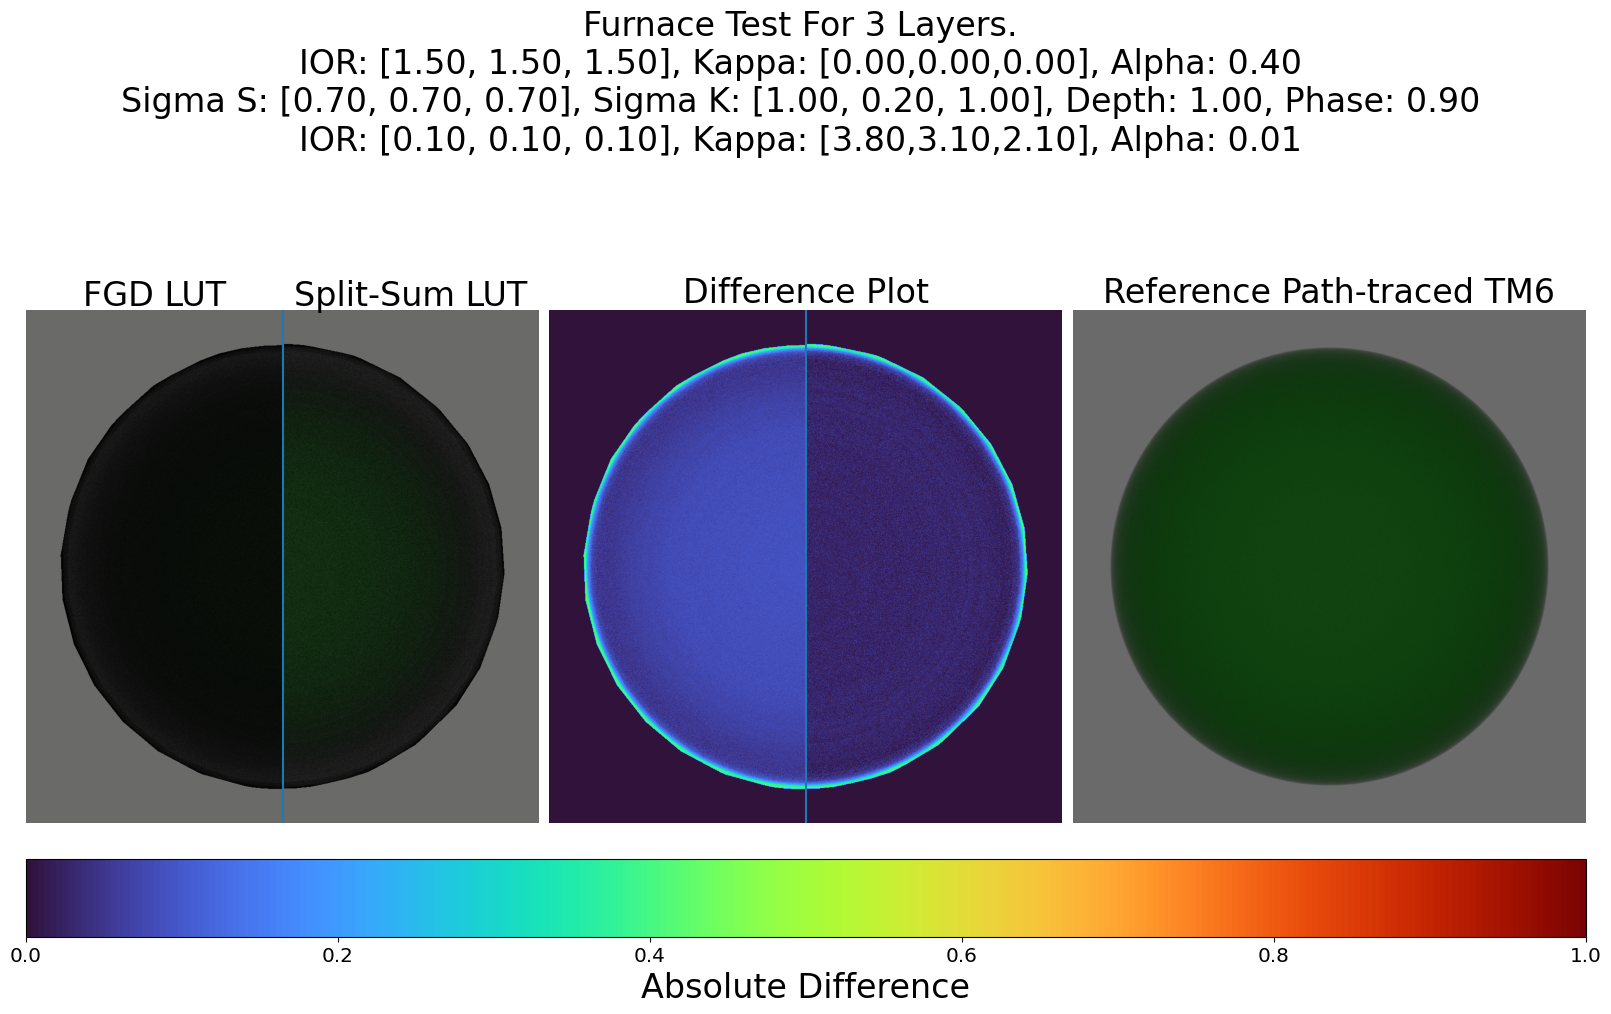

In [8]:
realtimesplitsumpath = 'comparisons/elephanttm6.exr'
realtimepath = 'comparisons/elephanttm6FGD.exr'
referencepath ='comparisons/elephanttm6ref.exr'
#IOR: 1.1, Kappa: 0.0, Alpha: 0.4\n IOR: 0.1, 0.4, 1.6, Kappa: 4.0, 2.4, 1.6, Alpha: 0.03 

LayerParams = [{"IOR": (1.5,1.5,1.5), "Kappa": (0.0,0.0,0.0), "Alpha": 0.4},\
               {"SigmaS": (0.7,0.7,0.7), "SigmaK": (1,0.2,1), "Depth": 1.0, "G": 0.9}, \
               {"IOR": (0.1,0.1,0.1), "Kappa": (3.8, 3.1, 2.1), "Alpha": 0.01}]

compare_plot(realtimesplitsumpath, realtimepath, referencepath, LayerParams, tm6=True)


(1024, 1024, 3)
Average Difference 0.025179760003235675
[0.41796875 0.41796875 0.4140625 ] [0.41959983 0.41959983 0.41959983] 0.0029331346352894916


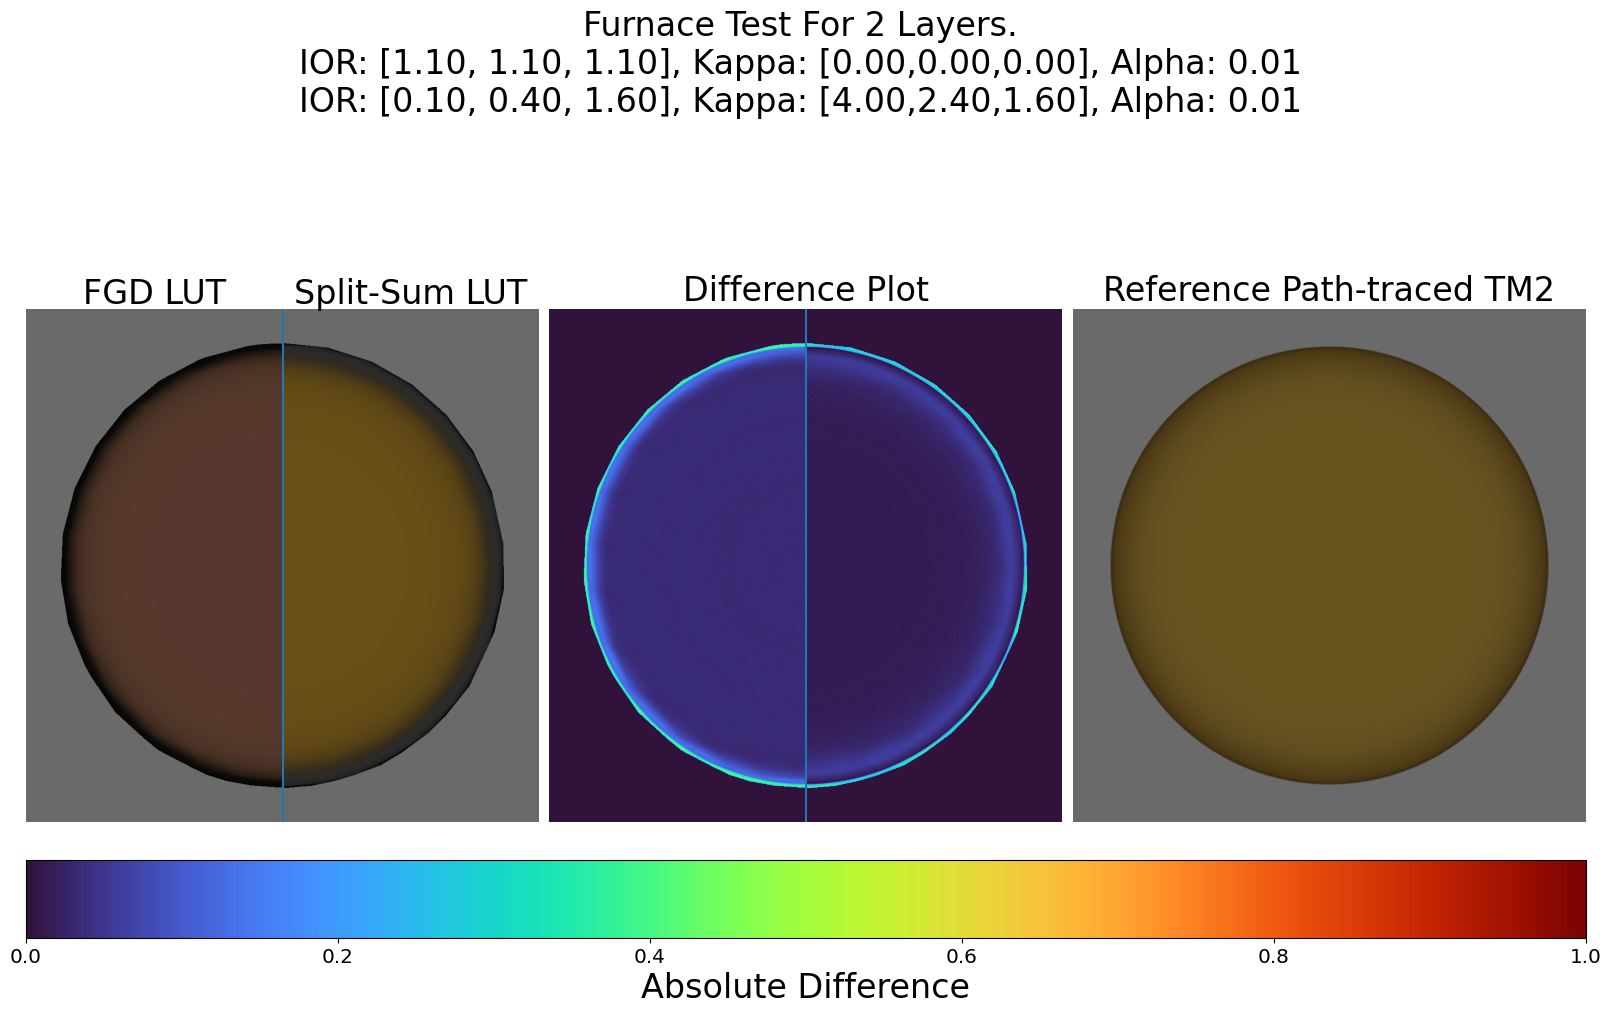

In [12]:
realtimesplitsumpath = 'comparisons/coppercomparisonsplitsum.exr'
realtimepath = 'comparisons/coppercomparison.exr'
referencepath ='comparisons/coppercomparisonref.exr'
#IOR: 1.1, Kappa: 0.0, Alpha: 0.4\n IOR: 0.1, 0.4, 1.6, Kappa: 4.0, 2.4, 1.6, Alpha: 0.03 

LayerParams = [{"IOR": (1.1,1.1,1.1), "Kappa": (0.0,0.0,0.0), "Alpha": 0.01},\
               {"IOR": (0.1,0.4,1.6), "Kappa": (4.0, 2.4, 1.6), "Alpha": 0.01}]

fig,ax = compare_plot(realtimesplitsumpath, realtimepath, referencepath, LayerParams)
fig.savefig('comparisons/copperplot.png')


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..2.96875].


(1024, 1024, 3)
Average Difference 0.016183256683253454
[0.41796875 0.41796875 0.4140625 ] [0.41959983 0.41959983 0.41959983] 0.0029331346352894916


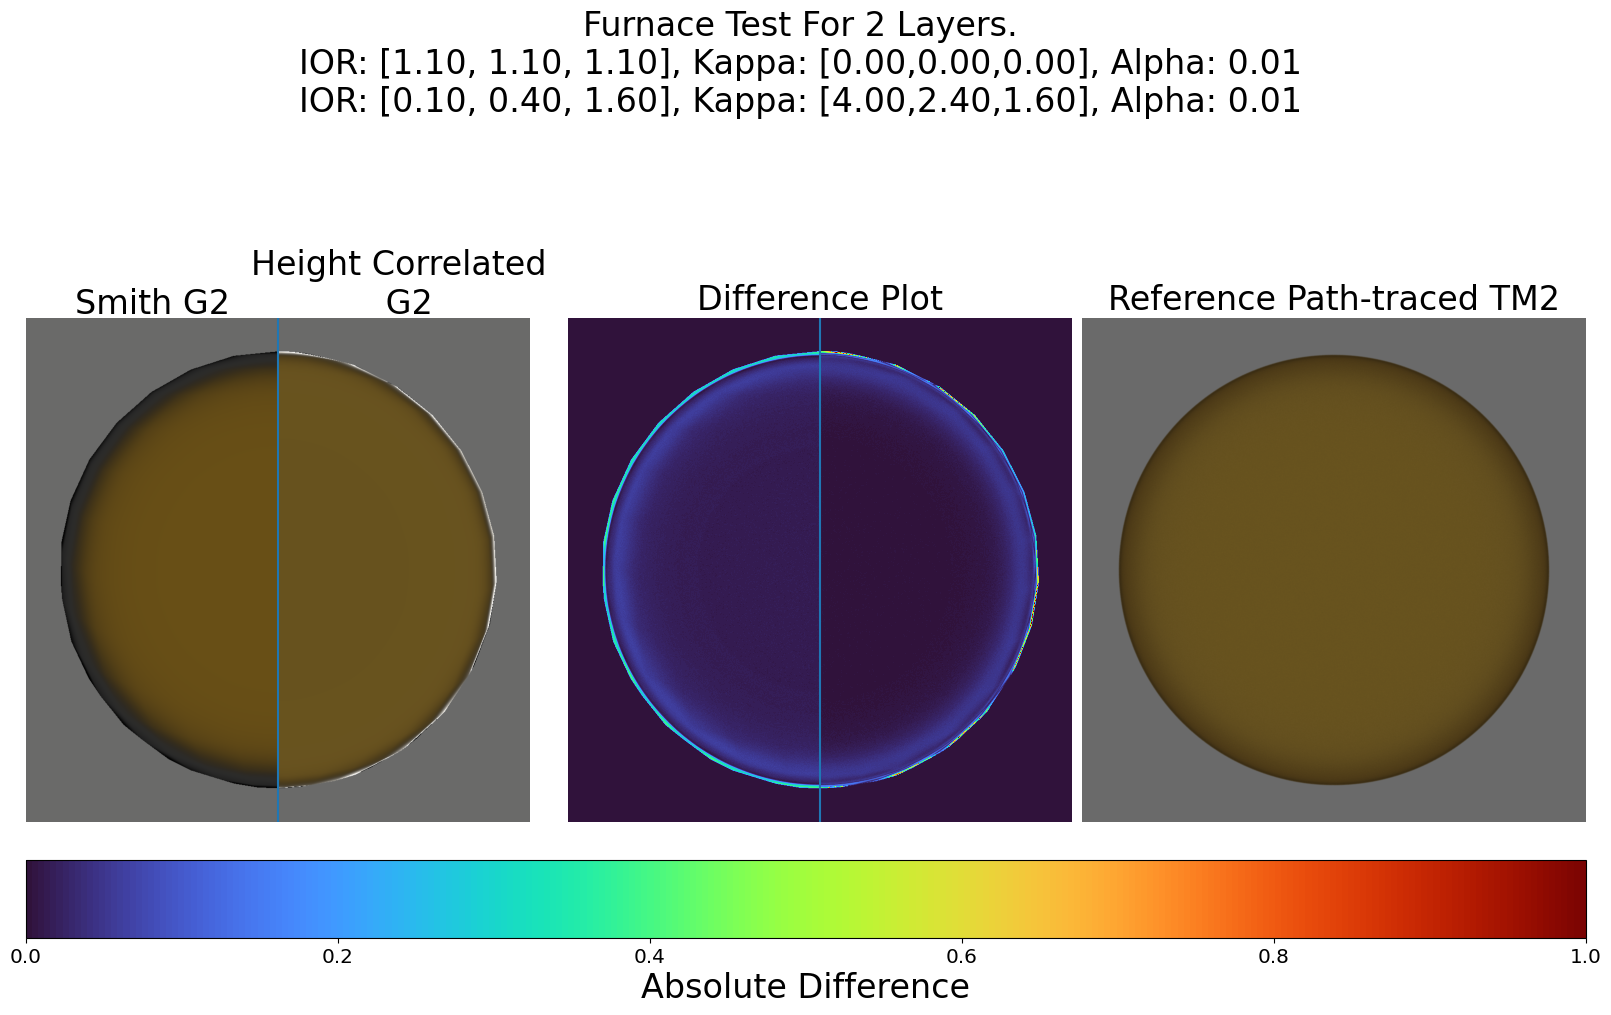

In [13]:
realtimesplitsumpath = 'comparisons/coppercomparisonsplitsumheightcorrelated.exr'
realtimepath = 'comparisons/coppercomparisonsplitsum.exr'
referencepath ='comparisons/coppercomparisonref.exr'
#IOR: 1.1, Kappa: 0.0, Alpha: 0.4\n IOR: 0.1, 0.4, 1.6, Kappa: 4.0, 2.4, 1.6, Alpha: 0.03 

LayerParams = [{"IOR": (1.1,1.1,1.1), "Kappa": (0.0,0.0,0.0), "Alpha": 0.01},\
               {"IOR": (0.1,0.4,1.6), "Kappa": (4.0, 2.4, 1.6), "Alpha": 0.01}]

fig, ax = compare_plot(realtimesplitsumpath, realtimepath, referencepath, LayerParams, leftLabel="Smith G2", rightLabel="Height Correlated \n G2")
fig.savefig('comparisons/heightcorrelated.png')